In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
## Load modules
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
from scipy import stats

import os
import joblib
import pickle
import sys

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from joblib import dump




## Import modules
import matplotlib.pyplot as plt 
from matplotlib.gridspec import GridSpec
import sys


sys.path.append('/home/freimax/msc_thesis/scripts/random_forest/')
import rf_functions

sys.path.append('/home/freimax/msc_thesis/scripts/helpers/')
from data_preprocessing_helpers import get_cross_section_data

sys.path.append('/home/freimax/msc_thesis/scripts/plotting_functions/')
#from plot_functions import plot_cross_section
from plot_crosec_rf_evaluation import plot_cross_section
sys.path.append('/home/freimax/msc_thesis/scripts/plotting_functions/sandbox/')
from rf_evaluation_crosec_test import plot_cross_section_test


In [3]:
## Load models:
tmeltsi_model = joblib.load("/net/helium/atmosdyn/freimax/data_msc/IFS-18/rf_models/tmeltsi/full_data_girdsearch_tmeltsi_f1.joblib")
print('Model 1 loaded')

model_name = 'rf_fulldata_gridsearch_f1'
filepath = f"/net/helium/atmosdyn/freimax/data_msc/IFS-18/rf_models/tsubsi/{model_name}.joblib"
tsubsi_model = joblib.load(filepath)
print('Model 2 loaded')

Model 1 loaded
Model 2 loaded


In [6]:
# Load data and prepare cross-section data
ds_p = xr.open_mfdataset('/home/freimax/msc_thesis/data/case_study_ra19/ifs_17/P_p*_lonlatbox.nc')
ds_s = xr.open_mfdataset('/home/freimax/msc_thesis/data/case_study_ra19/ifs_17/S_p*_lonlatbox.nc')
ds_cc = xr.open_mfdataset('/home/freimax/msc_thesis/data/case_study_ra19/ifs_17/additional_fields/CC_p*.nc')
da_rh = xr.open_dataset('/home/freimax/msc_thesis/data/case_study_ra19/ifs_17/additional_fields/RH_ifs.nc')
da_rh = da_rh.isel(time=slice(0,-1))
# Combine snow metrics
ds_p['tsubsi'] = ds_p['tsubi'] + ds_p['tsubs']
ds_p['tmeltsi'] = ds_p['tmelti'] + ds_p['tmelts']
ds_p['SIWC'] = ds_p['IWC'] + ds_p['SWC']
ds_p['TH'] = ds_s['TH'].assign_coords(ds_p.coords)
ds_p['CC'] = ds_cc['CC'].assign_coords(ds_p.coords)
ds_p['RH_ifs'] = da_rh['RH_ifs'].assign_coords(ds_p.coords)

ds_p['Temp'] = ds_p['T'] 
ds_p['W'] = ds_p['OMEGA'] 

In [7]:
## Make rf predictions

features = ['SIWC', 'LWC', 'RWC', 'RH', 'Q', 'CC', 'OMEGA', 'T']
tsubsi_pred = rf_functions.predict_bcp_labels(ds_p, tsubsi_model, water_type='SIWC', feature_names = features, type_filteredvalues='nan', add_temp_filter=False)
ds_p['tsubsi_pred'] = tsubsi_pred.assign_coords(ds_p.coords)
print('\n===============================================================================================================================\n')
tmeltsi_pred = rf_functions.predict_bcp_labels(ds_p, tmeltsi_model, water_type='SIWC', feature_names = features, type_filteredvalues='nan', add_temp_filter=True)
ds_p['tmeltsi_pred'] = tmeltsi_pred.assign_coords(ds_p.coords)


Predict labels using random forest:
-------------------------------------------------------------------------------------------------------------
Create flattened features datframe
Apply domain-filter to df_features:
Drop all points where SIWC == 0


Ouput filtered_df and domain_filter


Predict labels with RF

Reshape predictions to 4d data-array with shape (72, 84, 126, 150).
	Filtered values are set to NaN
-------------------------------------------------------------------------------------------------------------




Predict labels using random forest:
-------------------------------------------------------------------------------------------------------------
Create flattened features datframe
Apply domain-filter (water+temperature) to df_features:
Drop all points where SIWC == 0 and Temp < 0


Ouput filtered_df and domain_filter


Predict labels with RF

Reshape predictions to 4d data-array with shape (72, 84, 126, 150).
	Filtered values are set to NaN
--------------------------

In [39]:
########################################################################################################
########################                Define Variables for PLOTS              ########################
#------------------------------------------------------------------------------------------------------#
## Define Start and end points         #  

lon_start1, lon_end1 = 163.0 , 175.0    #
lat_start1, lat_end1 =  33.0 ,  49.0    #

lon_start2, lon_end2 = 150.0 , 180.0    #
lat_start2, lat_end2 =  52.0 ,  37.0    #

lon_start3, lon_end3 = 165.0 , 173.0     #
lat_start3, lat_end3 =  45.0 ,  37.0    #

lon_start4, lon_end4 = 165.0 , 165.0    #
lat_start4, lat_end4 =  60.0 ,  35.0    #

lon_start5, lon_end5 = 150.0 , 180.0    #
lat_start5, lat_end5 =  45.0 ,  45.0    #


## Create a list for all lon and lats values
lon_starts = [lon_start1, lon_start2, lon_start3, lon_start4, lon_start5]
lon_ends   = [lon_end1, lon_end2, lon_end3, lon_end4, lon_end5]
lat_starts = [lat_start1, lat_start2, lat_start3, lat_start4, lat_start5]
lat_ends   = [lat_end1, lat_end2, lat_end3, lat_end4, lat_end5]

special_note = ['']




# lon_starts = [150.0]
# lon_ends   = [180.0,]
# lat_starts = [50.0]
# lat_ends   = [39.0]



# lon_start1, lon_end1 = 170.0 , 170.0    #
# lat_start1, lat_end1 =  35.0 ,  50.0    #

# lon_start2, lon_end2 = 172.0 , 172.0    #
# lat_start2, lat_end2 =  35.0 ,  50.0    #

# lon_start3, lon_end3 = 165.0 , 173.0    #
# lat_start3, lat_end3 =  45.0 ,  50.0    #

# lon_start4, lon_end4 = 165.0 , 173.0    #
# lat_start4, lat_end4 =  40.0 ,  40.0    #

# lon_start5, lon_end5 = 165.0 , 173.0    #
# lat_start5, lat_end5 =  35.0 ,  35.0    #


# lon_starts = [lon_start1, lon_start2, lon_start3, lon_start4, lon_start5, ]
# lon_ends   = [lon_end1, lon_end2, lon_end3, lon_end4, lon_end5]
# lat_starts = [lat_start1, lat_start2, lat_start3, lat_start4, lat_start5, ]
# lat_ends   = [lat_end1, lat_end2, lat_end3, lat_end4, lat_end5]
# special_note = 'coldfrot'



Plot with lon/lat: 163.0/33.0 to 175.0/49.0

Add attribute "plotted fields to fig

Plot Contour tsubsi
Plot Contour tmeltsi

Current cbar ID: cbar_tsubsi
Never seen cbar_tsubsi before, will plot colorbar and then put it in list so that we dont plot it next time


Current cbar ID: cbar_tmeltsi
Never seen cbar_tmeltsi before, will plot colorbar and then put it in list so that we dont plot it next time

Plot Contour RH_ifs
Plot Contour TH
Plot Contour isotherms
Plot Contour tsubsi_thr_weak
No contour
Plot Contour tsubsi_thr_strong
No contour
Plot Contour tmeltsi_thr_weak
Plot Contour tmeltsi_thr_strong
Plot Contour tsubsi_pred
Plot Contour tmeltsi_pred

Current cbar ID: cbar_tsubsi

Current cbar ID: cbar_tmeltsi
Plot Contour RH_ifs
Plot Contour TH
Plot Contour isotherms
Plot Contour tsubsi_thr_weak
No contour
Plot Contour tsubsi_thr_strong
No contour
Plot Contour tmeltsi_thr_weak
Plot Contour tmeltsi_thr_strong


/home/freimax/.conda/envs/maxpy3_2022/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/freimax/.conda/envs/maxpy3_2022/lib/python3.9/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/freimax/.conda/envs/maxpy3_2022/lib/python3.9/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:




lonmin: <xarray.DataArray 'lon' ()>
array(315.19999695)
Coordinates:
    time       datetime64[ns] 2017-04-10T17:00:00
    metpy_crs  object Projection: latitude_longitude, 	 lonmax: <xarray.DataArray 'lon' ()>
array(374.80000305)
Coordinates:
    time       datetime64[ns] 2017-04-10T17:00:00
    metpy_crs  object Projection: latitude_longitude 
latmin:<xarray.DataArray 'lat' ()>
array(20.)
Coordinates:
    time       datetime64[ns] 2017-04-10T17:00:00
    metpy_crs  object Projection: latitude_longitude, 	 latmax: <xarray.DataArray 'lat' ()>
array(70.)
Coordinates:
    time       datetime64[ns] 2017-04-10T17:00:00
    metpy_crs  object Projection: latitude_longitude


Residual field will be plotted: residual_tsubsi
Residual field will be plotted: residual_tmeltsi

Current cbar ID: cbar_res_tsubsi
Never seen cbar_res_tsubsi before, will plot colorbar and then put it in list so that we dont plot it next time


Current cbar ID: cbar_res_tmeltsi
Never seen cbar_res_tmeltsi before, will 

/home/freimax/.conda/envs/maxpy3_2022/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/freimax/.conda/envs/maxpy3_2022/lib/python3.9/site-packages/cartopy/crs.py:836: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/home/freimax/.conda/envs/maxpy3_2022/lib/python3.9/site-packages/cartopy/crs.py:836: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/h


Plot with lon/lat: 150.0/52.0 to 180.0/37.0

Add attribute "plotted fields to fig

Plot Contour tsubsi
Plot Contour tmeltsi

Current cbar ID: cbar_tsubsi
Never seen cbar_tsubsi before, will plot colorbar and then put it in list so that we dont plot it next time


Current cbar ID: cbar_tmeltsi
Never seen cbar_tmeltsi before, will plot colorbar and then put it in list so that we dont plot it next time

Plot Contour RH_ifs
Plot Contour TH
Plot Contour isotherms
Plot Contour tsubsi_thr_weak
No contour
Plot Contour tsubsi_thr_strong
No contour
Plot Contour tmeltsi_thr_weak
Plot Contour tmeltsi_thr_strong
Plot Contour tsubsi_pred
Plot Contour tmeltsi_pred

Current cbar ID: cbar_tsubsi

Current cbar ID: cbar_tmeltsi
Plot Contour RH_ifs
Plot Contour TH
Plot Contour isotherms
Plot Contour tsubsi_thr_weak
No contour
Plot Contour tsubsi_thr_strong
No contour
Plot Contour tmeltsi_thr_weak
Plot Contour tmeltsi_thr_strong


/home/freimax/.conda/envs/maxpy3_2022/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/freimax/.conda/envs/maxpy3_2022/lib/python3.9/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/freimax/.conda/envs/maxpy3_2022/lib/python3.9/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:




lonmin: <xarray.DataArray 'lon' ()>
array(315.19999695)
Coordinates:
    time       datetime64[ns] 2017-04-10T17:00:00
    metpy_crs  object Projection: latitude_longitude, 	 lonmax: <xarray.DataArray 'lon' ()>
array(374.80000305)
Coordinates:
    time       datetime64[ns] 2017-04-10T17:00:00
    metpy_crs  object Projection: latitude_longitude 
latmin:<xarray.DataArray 'lat' ()>
array(20.)
Coordinates:
    time       datetime64[ns] 2017-04-10T17:00:00
    metpy_crs  object Projection: latitude_longitude, 	 latmax: <xarray.DataArray 'lat' ()>
array(70.)
Coordinates:
    time       datetime64[ns] 2017-04-10T17:00:00
    metpy_crs  object Projection: latitude_longitude


Residual field will be plotted: residual_tsubsi
Residual field will be plotted: residual_tmeltsi

Current cbar ID: cbar_res_tsubsi
Never seen cbar_res_tsubsi before, will plot colorbar and then put it in list so that we dont plot it next time


Current cbar ID: cbar_res_tmeltsi
Never seen cbar_res_tmeltsi before, will 

/home/freimax/.conda/envs/maxpy3_2022/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/freimax/.conda/envs/maxpy3_2022/lib/python3.9/site-packages/cartopy/crs.py:836: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/home/freimax/.conda/envs/maxpy3_2022/lib/python3.9/site-packages/cartopy/crs.py:836: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/h


Plot with lon/lat: 165.0/45.0 to 173.0/37.0

Add attribute "plotted fields to fig

Plot Contour tsubsi
Plot Contour tmeltsi

Current cbar ID: cbar_tsubsi
Never seen cbar_tsubsi before, will plot colorbar and then put it in list so that we dont plot it next time


Current cbar ID: cbar_tmeltsi
Never seen cbar_tmeltsi before, will plot colorbar and then put it in list so that we dont plot it next time

Plot Contour RH_ifs
Plot Contour TH
Plot Contour isotherms
Plot Contour tsubsi_thr_weak
No contour
Plot Contour tsubsi_thr_strong
No contour
Plot Contour tmeltsi_thr_weak
Plot Contour tmeltsi_thr_strong
Plot Contour tsubsi_pred
Plot Contour tmeltsi_pred

Current cbar ID: cbar_tsubsi

Current cbar ID: cbar_tmeltsi
Plot Contour RH_ifs
Plot Contour TH
Plot Contour isotherms
Plot Contour tsubsi_thr_weak
No contour
Plot Contour tsubsi_thr_strong
No contour
Plot Contour tmeltsi_thr_weak
Plot Contour tmeltsi_thr_strong


/home/freimax/.conda/envs/maxpy3_2022/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/freimax/.conda/envs/maxpy3_2022/lib/python3.9/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/freimax/.conda/envs/maxpy3_2022/lib/python3.9/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:




lonmin: <xarray.DataArray 'lon' ()>
array(315.19999695)
Coordinates:
    time       datetime64[ns] 2017-04-10T17:00:00
    metpy_crs  object Projection: latitude_longitude, 	 lonmax: <xarray.DataArray 'lon' ()>
array(374.80000305)
Coordinates:
    time       datetime64[ns] 2017-04-10T17:00:00
    metpy_crs  object Projection: latitude_longitude 
latmin:<xarray.DataArray 'lat' ()>
array(20.)
Coordinates:
    time       datetime64[ns] 2017-04-10T17:00:00
    metpy_crs  object Projection: latitude_longitude, 	 latmax: <xarray.DataArray 'lat' ()>
array(70.)
Coordinates:
    time       datetime64[ns] 2017-04-10T17:00:00
    metpy_crs  object Projection: latitude_longitude


Residual field will be plotted: residual_tsubsi
Residual field will be plotted: residual_tmeltsi

Current cbar ID: cbar_res_tsubsi
Never seen cbar_res_tsubsi before, will plot colorbar and then put it in list so that we dont plot it next time


Current cbar ID: cbar_res_tmeltsi
Never seen cbar_res_tmeltsi before, will 

/home/freimax/.conda/envs/maxpy3_2022/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/freimax/.conda/envs/maxpy3_2022/lib/python3.9/site-packages/cartopy/crs.py:836: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/home/freimax/.conda/envs/maxpy3_2022/lib/python3.9/site-packages/cartopy/crs.py:836: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/h


Plot with lon/lat: 165.0/60.0 to 165.0/35.0

Add attribute "plotted fields to fig

Plot Contour tsubsi
Plot Contour tmeltsi

Current cbar ID: cbar_tsubsi
Never seen cbar_tsubsi before, will plot colorbar and then put it in list so that we dont plot it next time


Current cbar ID: cbar_tmeltsi
Never seen cbar_tmeltsi before, will plot colorbar and then put it in list so that we dont plot it next time

Plot Contour RH_ifs
Plot Contour TH
Plot Contour isotherms
Plot Contour tsubsi_thr_weak
No contour
Plot Contour tsubsi_thr_strong
No contour
Plot Contour tmeltsi_thr_weak
Plot Contour tmeltsi_thr_strong


/home/freimax/msc_thesis/scripts/plotting_functions/plot_crosec_rf_evaluation.py:276: UserWarning: No contour levels were found within the data range.
  colors=colors,


Plot Contour tsubsi_pred
Plot Contour tmeltsi_pred

Current cbar ID: cbar_tsubsi

Current cbar ID: cbar_tmeltsi
Plot Contour RH_ifs
Plot Contour TH
Plot Contour isotherms
Plot Contour tsubsi_thr_weak
No contour
Plot Contour tsubsi_thr_strong
No contour
Plot Contour tmeltsi_thr_weak
Plot Contour tmeltsi_thr_strong


/home/freimax/msc_thesis/scripts/plotting_functions/plot_crosec_rf_evaluation.py:276: UserWarning: No contour levels were found within the data range.
  colors=colors,
/home/freimax/.conda/envs/maxpy3_2022/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/freimax/.conda/envs/maxpy3_2022/lib/python3.9/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/freimax/.conda/envs/maxpy3_2022/lib/python3.9/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in



lonmin: <xarray.DataArray 'lon' ()>
array(315.19999695)
Coordinates:
    time       datetime64[ns] 2017-04-10T17:00:00
    metpy_crs  object Projection: latitude_longitude, 	 lonmax: <xarray.DataArray 'lon' ()>
array(374.80000305)
Coordinates:
    time       datetime64[ns] 2017-04-10T17:00:00
    metpy_crs  object Projection: latitude_longitude 
latmin:<xarray.DataArray 'lat' ()>
array(20.)
Coordinates:
    time       datetime64[ns] 2017-04-10T17:00:00
    metpy_crs  object Projection: latitude_longitude, 	 latmax: <xarray.DataArray 'lat' ()>
array(70.)
Coordinates:
    time       datetime64[ns] 2017-04-10T17:00:00
    metpy_crs  object Projection: latitude_longitude


Residual field will be plotted: residual_tsubsi
Residual field will be plotted: residual_tmeltsi

Current cbar ID: cbar_res_tsubsi
Never seen cbar_res_tsubsi before, will plot colorbar and then put it in list so that we dont plot it next time


Current cbar ID: cbar_res_tmeltsi
Never seen cbar_res_tmeltsi before, will 

/home/freimax/.conda/envs/maxpy3_2022/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/freimax/.conda/envs/maxpy3_2022/lib/python3.9/site-packages/cartopy/crs.py:836: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/home/freimax/.conda/envs/maxpy3_2022/lib/python3.9/site-packages/cartopy/crs.py:836: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/h


Plot with lon/lat: 150.0/45.0 to 180.0/45.0

Add attribute "plotted fields to fig

Plot Contour tsubsi
Plot Contour tmeltsi

Current cbar ID: cbar_tsubsi
Never seen cbar_tsubsi before, will plot colorbar and then put it in list so that we dont plot it next time


Current cbar ID: cbar_tmeltsi
Never seen cbar_tmeltsi before, will plot colorbar and then put it in list so that we dont plot it next time

Plot Contour RH_ifs
Plot Contour TH
Plot Contour isotherms
Plot Contour tsubsi_thr_weak
No contour
Plot Contour tsubsi_thr_strong


/home/freimax/msc_thesis/scripts/plotting_functions/plot_crosec_rf_evaluation.py:276: UserWarning: No contour levels were found within the data range.
  colors=colors,


No contour
Plot Contour tmeltsi_thr_weak
Plot Contour tmeltsi_thr_strong


/home/freimax/msc_thesis/scripts/plotting_functions/plot_crosec_rf_evaluation.py:276: UserWarning: No contour levels were found within the data range.
  colors=colors,


Plot Contour tsubsi_pred
Plot Contour tmeltsi_pred

Current cbar ID: cbar_tsubsi

Current cbar ID: cbar_tmeltsi
Plot Contour RH_ifs
Plot Contour TH
Plot Contour isotherms
Plot Contour tsubsi_thr_weak
No contour
Plot Contour tsubsi_thr_strong


/home/freimax/msc_thesis/scripts/plotting_functions/plot_crosec_rf_evaluation.py:276: UserWarning: No contour levels were found within the data range.
  colors=colors,


No contour
Plot Contour tmeltsi_thr_weak
Plot Contour tmeltsi_thr_strong


/home/freimax/msc_thesis/scripts/plotting_functions/plot_crosec_rf_evaluation.py:276: UserWarning: No contour levels were found within the data range.
  colors=colors,
/home/freimax/.conda/envs/maxpy3_2022/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/freimax/.conda/envs/maxpy3_2022/lib/python3.9/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/freimax/.conda/envs/maxpy3_2022/lib/python3.9/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in



lonmin: <xarray.DataArray 'lon' ()>
array(315.19999695)
Coordinates:
    time       datetime64[ns] 2017-04-10T17:00:00
    metpy_crs  object Projection: latitude_longitude, 	 lonmax: <xarray.DataArray 'lon' ()>
array(374.80000305)
Coordinates:
    time       datetime64[ns] 2017-04-10T17:00:00
    metpy_crs  object Projection: latitude_longitude 
latmin:<xarray.DataArray 'lat' ()>
array(20.)
Coordinates:
    time       datetime64[ns] 2017-04-10T17:00:00
    metpy_crs  object Projection: latitude_longitude, 	 latmax: <xarray.DataArray 'lat' ()>
array(70.)
Coordinates:
    time       datetime64[ns] 2017-04-10T17:00:00
    metpy_crs  object Projection: latitude_longitude


Residual field will be plotted: residual_tsubsi
Residual field will be plotted: residual_tmeltsi

Current cbar ID: cbar_res_tsubsi
Never seen cbar_res_tsubsi before, will plot colorbar and then put it in list so that we dont plot it next time


Current cbar ID: cbar_res_tmeltsi
Never seen cbar_res_tmeltsi before, will 

/home/freimax/.conda/envs/maxpy3_2022/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/freimax/.conda/envs/maxpy3_2022/lib/python3.9/site-packages/cartopy/crs.py:836: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/home/freimax/.conda/envs/maxpy3_2022/lib/python3.9/site-packages/cartopy/crs.py:836: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/h

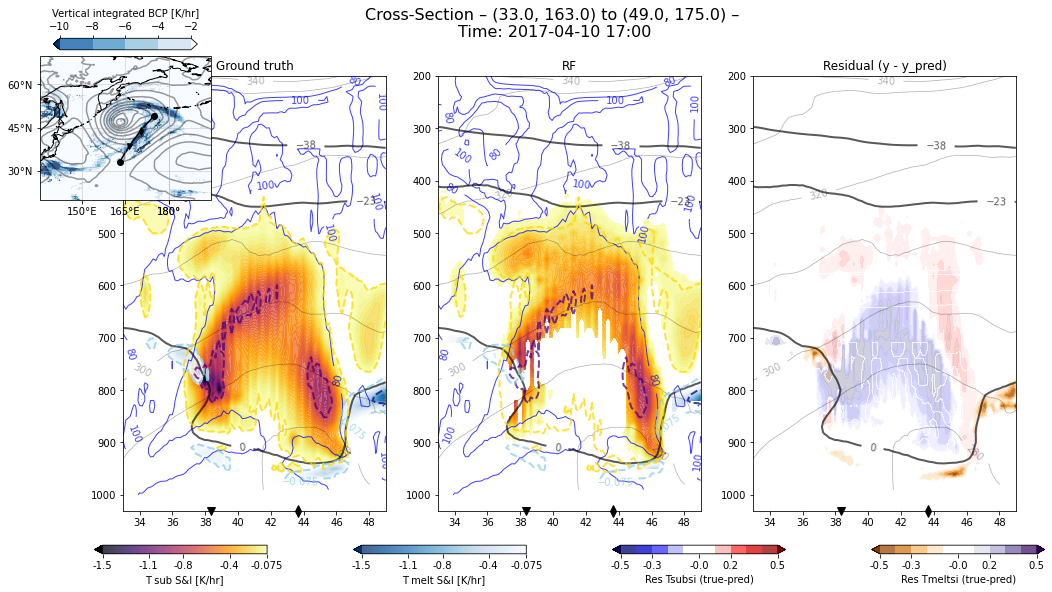

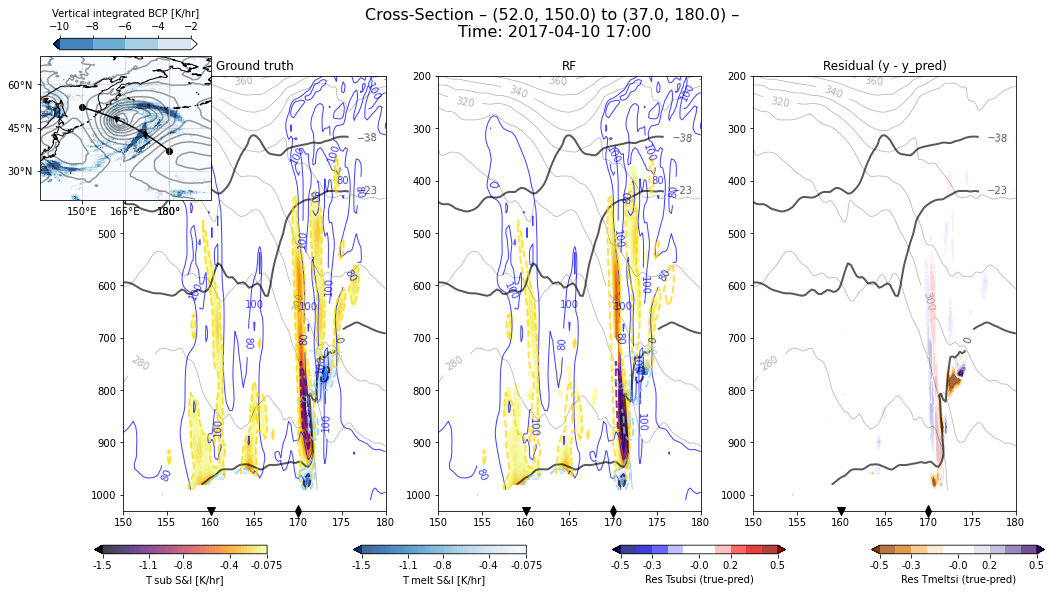

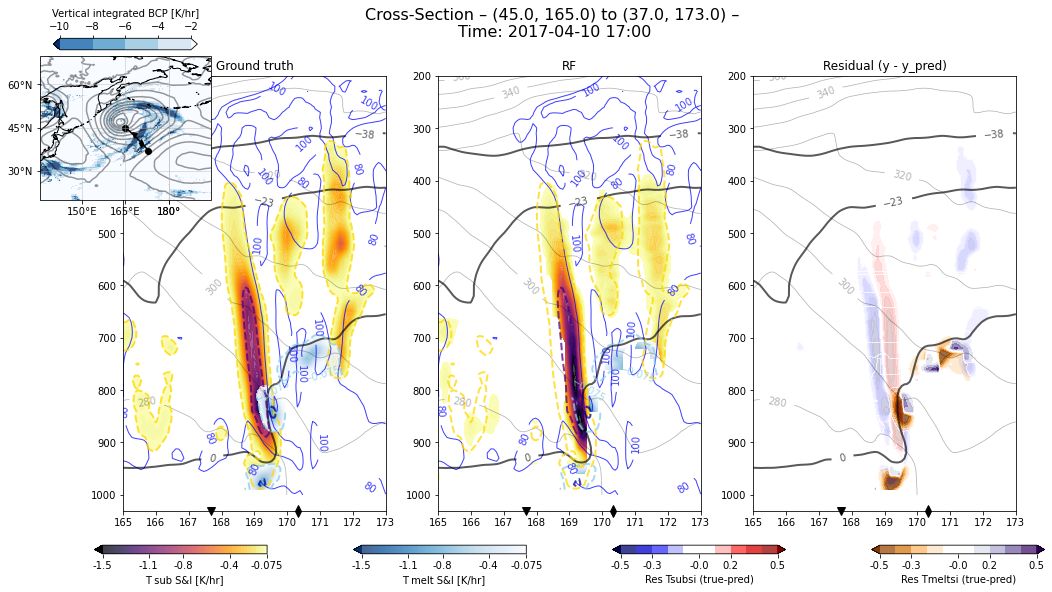

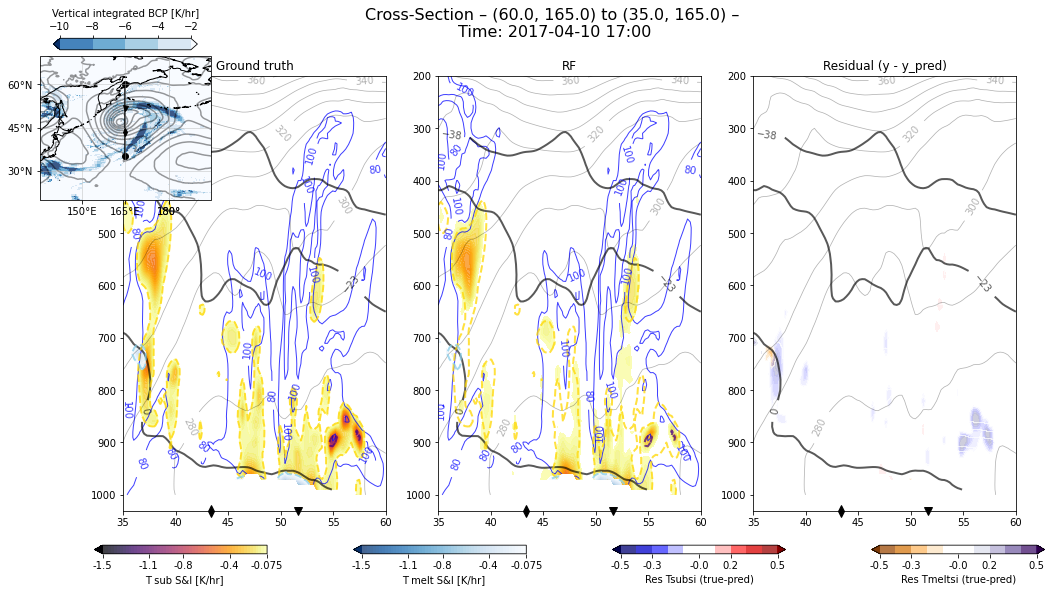

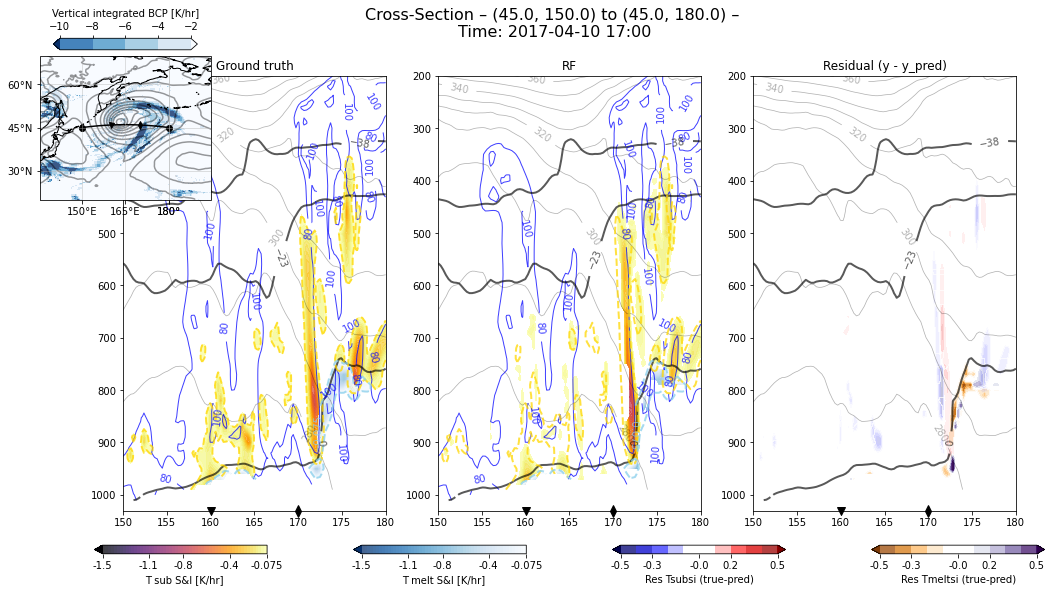

In [40]:
# Define time-step                    #
timestep = '2017-04-10-17'            #

## Choose contourf and contour

plot_cf1 = ['tsubsi', 'tmeltsi']
plot_c1  = [ 'RH_ifs', 'TH', 'isotherms', 'tsubsi_thr_weak', 'tsubsi_thr_strong', 'tmeltsi_thr_weak', 'tmeltsi_thr_strong']

plot_cf2 = ['tsubsi_pred', 'tmeltsi_pred']
plot_c2  = [ 'RH_ifs', 'TH', 'isotherms', 'tsubsi_thr_weak', 'tsubsi_thr_strong', 'tmeltsi_thr_weak', 'tmeltsi_thr_strong']

plot_cf3 = ['residual_tsubsi', 'residual_tmeltsi']
plot_c3  = ['TH', 'isotherms', ]

########################################################################################################





for lons, lats, lone, late in zip(lon_starts, lat_starts, lon_ends, lat_ends):
    start = (lats, lons)
    end = (late, lone)
    
    ##Prepare data
    all_data = get_cross_section_data(ds_p, start=start, end=end, timestep=timestep)

    data_p = all_data.get('data_p')
    cross_p = all_data.get('cross_p')
    tbcp_all_sum = all_data.get('tbcp_all')
    #-------------------------------------------------------------------------------------------------------------------------------------------------------------------- 
    # Create Figure
    print(f'\nPlot with lon/lat: {start[1]}/{start[0]} to {end[1]}/{end[0]}')
    fig = plt.figure(figsize=(16, 8))
    gs = GridSpec(1, 3)
    
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1], sharey=ax1)
    ax3 = fig.add_subplot(gs[0,2], sharey=ax1)
    # Set the suptitle
    fig.suptitle(f'Cross-Section \u2013 {start} to {end} \u2013 \n'
                f'Time: {cross_p["time"].dt.strftime("%Y-%m-%d %H:%M").item()}', fontsize=16, y=1.0)
    img1 = plot_cross_section(ax=ax1, cross_p=cross_p, data_p=data_p, start=start, end=end, plot_contourf=plot_cf1, plot_contour=plot_c1,    
                                show_wind_barbs=False, show_clouds=False,  show_precip=False, inset_contourf=None, baseline_bcp=None, rf_bcp=False)
    ax1.set_title('Ground truth')

    img2 = plot_cross_section(ax=ax2, cross_p=cross_p, data_p=data_p, start=start, end=end, plot_contourf=plot_cf2, plot_contour=plot_c2,    
                                show_wind_barbs=False, show_clouds=False, show_precip=False, inset_contourf='all_bcp_sums', baseline_bcp=None, rf_bcp=False)    
    ax2.set_title('RF')


    img3 = plot_cross_section(ax=ax3, cross_p=cross_p, data_p=data_p, start=start, end=end, plot_contourf=plot_cf3, plot_contour=plot_c3,    
                            show_wind_barbs=False, show_clouds=False,  show_precip=False, inset_contourf=None, baseline_bcp=None, rf_bcp=False)
    ax3.set_title('Residual (y - y_pred)')
    #---------------------------------------------------------------------------------    
    plt.savefig(f'/home/freimax/msc_thesis/figures/random_forest/RA_case_study19/evaluation_cross_sections/crosec_from{start}_to{end}_{special_note}_t{cross_p["time"].dt.strftime("%Y%m%d-%H").item()}.png', dpi=300)
    #plt.show()



Add attribute "plotted fields to fig

Plot Contour tsubsi
Plot Contour tmeltsi

Current cbar ID: cbar_tsubsi
Never seen cbar_tsubsi before, will plot colorbar and then put it in list so that we dont plot it next time


Current cbar ID: cbar_tmeltsi
Never seen cbar_tmeltsi before, will plot colorbar and then put it in list so that we dont plot it next time



/home/freimax/.conda/envs/maxpy3_2022/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/freimax/.conda/envs/maxpy3_2022/lib/python3.9/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/freimax/.conda/envs/maxpy3_2022/lib/python3.9/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:




lonmin: <xarray.DataArray 'lon' ()>
array(315.19999695)
Coordinates:
    time       datetime64[ns] 2017-04-10T17:00:00
    metpy_crs  object Projection: latitude_longitude, 	 lonmax: <xarray.DataArray 'lon' ()>
array(374.80000305)
Coordinates:
    time       datetime64[ns] 2017-04-10T17:00:00
    metpy_crs  object Projection: latitude_longitude 
latmin:<xarray.DataArray 'lat' ()>
array(20.)
Coordinates:
    time       datetime64[ns] 2017-04-10T17:00:00
    metpy_crs  object Projection: latitude_longitude, 	 latmax: <xarray.DataArray 'lat' ()>
array(70.)
Coordinates:
    time       datetime64[ns] 2017-04-10T17:00:00
    metpy_crs  object Projection: latitude_longitude


Plot Contour tsubsi_pred
Plot Contour tmeltsi_pred

Current cbar ID: cbar_tsubsi

Current cbar ID: cbar_tmeltsi


/home/freimax/.conda/envs/maxpy3_2022/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/freimax/.conda/envs/maxpy3_2022/lib/python3.9/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/freimax/.conda/envs/maxpy3_2022/lib/python3.9/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:




lonmin: <xarray.DataArray 'lon' ()>
array(315.19999695)
Coordinates:
    time       datetime64[ns] 2017-04-10T17:00:00
    metpy_crs  object Projection: latitude_longitude, 	 lonmax: <xarray.DataArray 'lon' ()>
array(374.80000305)
Coordinates:
    time       datetime64[ns] 2017-04-10T17:00:00
    metpy_crs  object Projection: latitude_longitude 
latmin:<xarray.DataArray 'lat' ()>
array(20.)
Coordinates:
    time       datetime64[ns] 2017-04-10T17:00:00
    metpy_crs  object Projection: latitude_longitude, 	 latmax: <xarray.DataArray 'lat' ()>
array(70.)
Coordinates:
    time       datetime64[ns] 2017-04-10T17:00:00
    metpy_crs  object Projection: latitude_longitude


Residual field will be plotted: residual_tsubsi
Residual field will be plotted: residual_tmeltsi

Current cbar ID: cbar_res_tsubsi
Never seen cbar_res_tsubsi before, will plot colorbar and then put it in list so that we dont plot it next time


Current cbar ID: cbar_res_tmeltsi
Never seen cbar_res_tmeltsi before, will 

/home/freimax/.conda/envs/maxpy3_2022/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/freimax/.conda/envs/maxpy3_2022/lib/python3.9/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/freimax/.conda/envs/maxpy3_2022/lib/python3.9/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:




lonmin: <xarray.DataArray 'lon' ()>
array(315.19999695)
Coordinates:
    time       datetime64[ns] 2017-04-10T17:00:00
    metpy_crs  object Projection: latitude_longitude, 	 lonmax: <xarray.DataArray 'lon' ()>
array(374.80000305)
Coordinates:
    time       datetime64[ns] 2017-04-10T17:00:00
    metpy_crs  object Projection: latitude_longitude 
latmin:<xarray.DataArray 'lat' ()>
array(20.)
Coordinates:
    time       datetime64[ns] 2017-04-10T17:00:00
    metpy_crs  object Projection: latitude_longitude, 	 latmax: <xarray.DataArray 'lat' ()>
array(70.)
Coordinates:
    time       datetime64[ns] 2017-04-10T17:00:00
    metpy_crs  object Projection: latitude_longitude




/home/freimax/.conda/envs/maxpy3_2022/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/freimax/.conda/envs/maxpy3_2022/lib/python3.9/site-packages/cartopy/crs.py:836: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/home/freimax/.conda/envs/maxpy3_2022/lib/python3.9/site-packages/cartopy/crs.py:836: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/h

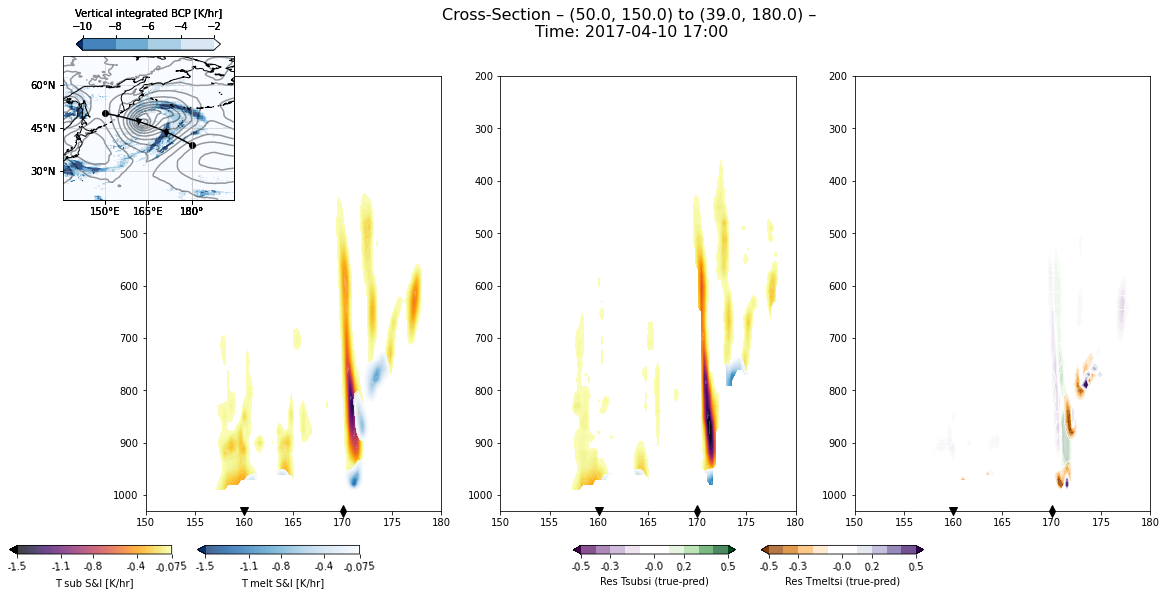

In [13]:
lon_starts = [150.0]
lon_ends   = [180.0,]
lat_starts = [50.0]
lat_ends   = [39.0]

timestep = '2017-04-10-17'            #
## Choose contourf and contour
plot_cf1 = ['tsubsi', 'tmeltsi']
plot_cf2 = ['tsubsi_pred', 'tmeltsi_pred']
plot_cf3 = ['residual_tsubsi', 'residual_tmeltsi']

for lons, lats, lone, late in zip(lon_starts, lat_starts, lon_ends, lat_ends):
    start = (lats, lons)
    end = (late, lone)
    
    ##Prepare data
    all_data = get_cross_section_data(ds_p, start=start, end=end, timestep=timestep)
    cross_p = all_data.get('cross_p')
    data_p = all_data.get('data_p')


    fig = plt.figure(figsize=(18, 8))
    gs = GridSpec(1, 3)
    ax1, ax2 = fig.add_subplot(gs[0, 0]), fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[0,2])
    # Set the suptitle
    fig.suptitle(f'Cross-Section \u2013 {start} to {end} \u2013 \n'
                f'Time: {cross_p["time"].dt.strftime("%Y-%m-%d %H:%M").item()}', fontsize=16, y=1.0)

    img1 = plot_cross_section(ax=ax1, cross_p=cross_p, data_p=data_p, start=start, end=end, plot_contourf=plot_cf1, plot_contour=[])
    img2 = plot_cross_section(ax=ax2, cross_p=cross_p, data_p=data_p, start=start, end=end, plot_contourf=plot_cf2, plot_contour=[])
    img3 = plot_cross_section(ax=ax3, cross_p=cross_p, data_p=data_p, start=start, end=end, plot_contourf=plot_cf3, plot_contour=[])

In [18]:
from matplotlib.colors import LinearSegmentedColormap

import matplotlib.colors as mcolors


In [30]:
#########################################################################################################################
#########                                     MAKE CUSTOM COLORMAPS                                             #########
#-----------------------------------------------------------------------------------------------------------------------#
## COLORBAR FOR RH_IFS                                                                                                  #
plasma_r = plt.cm.get_cmap('plasma_r', 100)                                                                             #
skyblue = plt.cm.get_cmap('Blues_r', 40)                                                                                #
                                                                                                                        #
colors0 = np.linspace([1, 1, 1, 1], [1, 1, 1, 1], 10)                                                                   #
white_to_yellow = np.linspace([1, 1, 1, 1], plasma_r(0), 30)                                                            #
colors1 = white_to_yellow                                                                                               #
colors2 = plasma_r(np.linspace(0, 1, 60))                                                                               #
colors3 = skyblue(np.linspace(0.1, 1, 40))                                                                              #
                                                                                                                        #
colors = np.vstack((colors0, colors1, colors2, colors3))                                                                #
rh_cust_cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)                                                 #
#-----------------------------------------------------------------------------------------------------------------------#                                                     
## COLORBAR FOR RESIDUAL FIELDS                                                                                         #
                                                                                                                        #
# Define the colors for our new colormap                                                                                #
cmap_seismic = plt.cm.get_cmap('seismic')                                                                               #
# Define the colors for our new colormap                                                                                #
colors = [(cmap_seismic(i/256)) for i in range(128)] + [(1,1,1,1)]*50 + [(cmap_seismic(i/256)) for i in range(128, 256)]#
tsubsi_cmap = mcolors.LinearSegmentedColormap.from_list("new_PRGn", colors)                                             #
                                                                                                                        #
# Define the RdYlGn colormap                                                                                            #
cmap_RdYlGn = plt.cm.get_cmap('RdYlGn')                                                                                 #
# Define the colors for our new colormap                                                                                #
colors = [(cmap_RdYlGn(i/256)) for i in range(128)] + [(1,1,1,1)]*50 + [(cmap_RdYlGn(i/256)) for i in range(128, 256)]  #
tevr_cmap = mcolors.LinearSegmentedColormap.from_list("new_RdYlGn", colors)                                             #
                                                                                                                        #
# Define the RdYlGn colormap                                                                                            #
cmap_PuOr = plt.cm.get_cmap('PuOr')                                                                                     #
# Define the colors for our new colormap                                                                                #
colors = [(cmap_PuOr(i/256)) for i in range(128)] + [(1,1,1,1)]*50 + [(cmap_PuOr(i/256)) for i in range(128, 256)]      #
tmeltsi_cmap = mcolors.LinearSegmentedColormap.from_list("new_PuOr", colors)                                            #
#########################################################################################################################

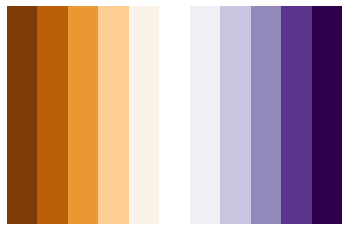

In [31]:
# This will display a gradient map of your custom colormap
plt.imshow(np.arange(-0.5, 0.51, 0.1)[None, :], aspect='auto', cmap=tmeltsi_cmap)
plt.axis('off')
plt.show()

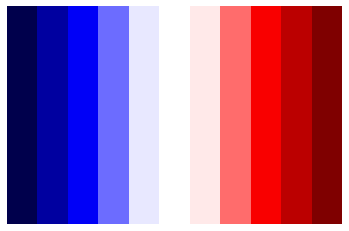

In [24]:
# This will display a gradient map of your custom colormap
plt.imshow(np.arange(-0.5, 0.51, 0.1)[None, :], aspect='auto', cmap=tsubsi_cmap)
plt.axis('off')
plt.show()

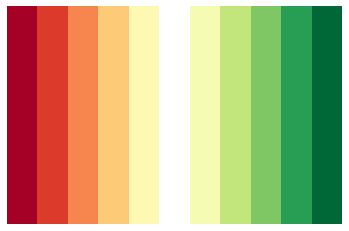

In [27]:
# This will display a gradient map of your custom colormap
plt.imshow(np.arange(-0.5, 0.51, 0.1)[None, :], aspect='auto', cmap=tevr_cmap)
plt.axis('off')
plt.show()